# Basic Use-case

In [1]:
import numpy as np
from narrow_escape.escape_plan import escape
from narrow_escape.escape_points import fibonacci_spheres, points_on_cube_surface
from narrow_escape.escape_utility import sphere_vol_to_r, calculate_delta
from tqdm import tqdm

In [2]:
D = 400
v = 1
a = 0.1
n_pores = 3
pores = fibonacci_spheres(n_pores, v)

N = 200

results = []
for i in tqdm(range(N)):
    results.append(escape(D, v, a, pores))

100%|██████████| 200/200 [00:04<00:00, 42.48it/s]


In [3]:
mov_avg = np.cumsum(results)/(1+np.arange(len(results)))

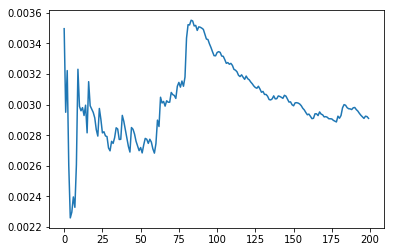

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(mov_avg)

# Visualising escape paths

<IPython.core.display.Javascript object>


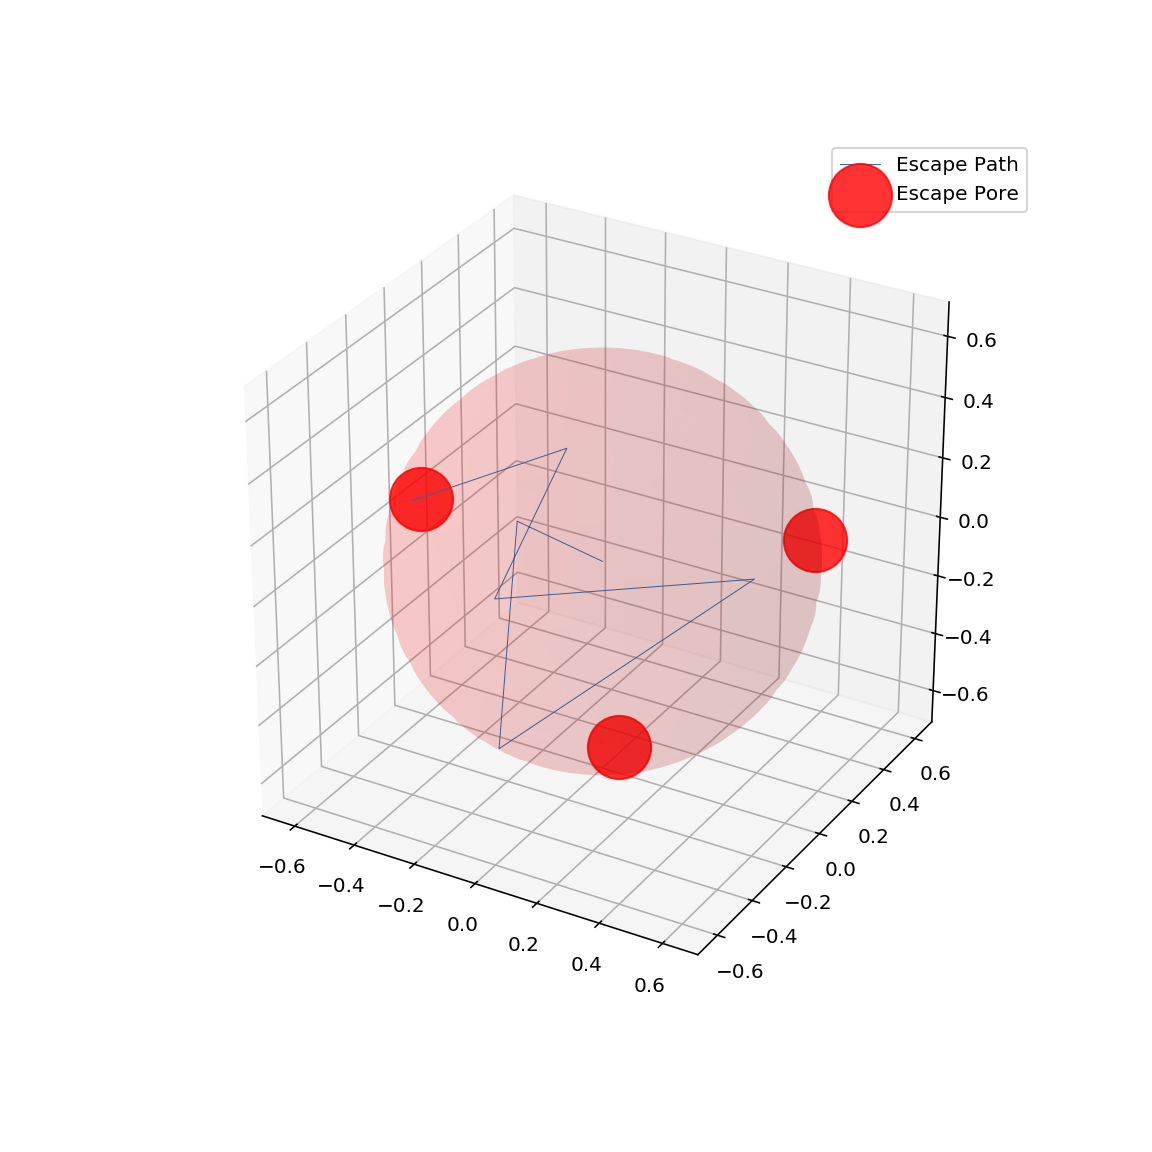

In [6]:
%matplotlib notebook
from narrow_escape.escape_drawing import draw_sphere

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

values = escape(D, v,a, pores, with_path=True)
ax.plot(np.append(values[:,0][::100],values[:,0][-1] ) ,
        np.append(values[:,1][::100], values[:,1][-1]),
        np.append(values[:,2][::100],values[:,2][-1]),
        alpha=1, linewidth=0.5, label='Escape Path')

draw_sphere(v, ax)

for idx, p in enumerate(pores):
    ax.scatter(p[0], p[1], p[2], c='r', alpha=0.8, s=1000, label='Escape Pore' if idx == 0 else "" )
ax.legend()